In [2]:
import tweepy
from datetime import timedelta, datetime
from pymongo import MongoClient
import pandas as pd
import numpy as np

df = pd.read_csv('authority-modularity.csv')
df=df.drop(['Label','timeset','Hub'],axis=1)

indexNames = df[ (df.modularity_class != 11) & (df.modularity_class != 9) & (df.modularity_class != 4) ].index
df.drop(indexNames , inplace=True)

df.modularity_class.value_counts()

first10_cl11=df[df.modularity_class == 11].sort_values('Authority', ascending=False).head(10)
first10_cl4=df[df.modularity_class == 4].sort_values('Authority', ascending=False).head(10)
first10_cl9=df[df.modularity_class == 9].sort_values('Authority', ascending=False).head(10)

utenti_cl11=first10_cl11.Id.tolist()
utenti_cl4=first10_cl4.Id.tolist()
utenti_cl9=first10_cl9.Id.tolist()

utenti_final= utenti_cl11+utenti_cl4+utenti_cl9


ACCESS_TOKEN = '1089903781880434688-SDhXR2aBBr54lZQ8QnPaE4mUR6TrOd'
ACCESS_SECRET = 'D6wHvFEmbL3W0FSP70jxBRpIYs53UGxuQlQ5yHf578ZDt'
CONSUMER_KEY = 'kGR5GYd09tSmQCJeyprOKlKeV'
CONSUMER_SECRET = 'MNeyyl0SkUOGgkIs8kDdZktPi2HCxC7mTv6re4GywsiarZDR3c'


auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) 
  
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET) 

api = tweepy.API(auth)


for idx, utente in enumerate(utenti_final):
    try:
        last_tweet = api.user_timeline(user_id=utente, count=1) 
        created_at = last_tweet[0].created_at
    
        if (created_at > datetime.now() - timedelta(days=90)):
            print('{}: this user is still active: {}\tlast post: {}'.format(idx,utente,created_at))
        else:
            utenti_final.remove(utente)
            print('inactive user {} droppato'.format(utente))
                
    except Exception as err:
        print(err)
        utenti_final.remove(utente)
        print('inactive user {} droppato'.format(utente))
        continue
        

client = MongoClient('localhost', 27017)
db = client['twitter']

data = pd.DataFrame(columns=['Tweets'])

for user in utenti_final:
    
    print('colleziono tweet utente numero:', user)

    pipeline=[{ "$project": {  "id_user" : 1, "originalTweet" : 1, "hashtag" : 1, "mention" : 1}}, { "$match": {  "id_user" : user} }]

    cursor_list = list(db['tweets'].aggregate(pipeline))

    tweets = pd.DataFrame(cursor_list)
    data=data.append(tweets, sort=True)

dfAll = pd.DataFrame(data)
dfAll.head(5)        

Not authorized.
inactive user 123926189 droppato
1: this user is still active: 52456063	last post: 2019-09-28 13:43:07
2: this user is still active: 18119568	last post: 2019-09-28 11:56:30
3: this user is still active: 14872161	last post: 2019-09-28 07:13:16
4: this user is still active: 10236782	last post: 2019-09-28 15:03:00
5: this user is still active: 45762728	last post: 2019-09-24 01:07:11
6: this user is still active: 175339579	last post: 2019-09-28 11:57:17
7: this user is still active: 171656520	last post: 2019-09-28 14:56:59
8: this user is still active: 21765964	last post: 2019-09-24 20:02:45
Not authorized.
inactive user 15773072 droppato
inactive user 42919671 droppato
11: this user is still active: 54292369	last post: 2019-09-27 20:14:06
12: this user is still active: 18084838	last post: 2019-09-28 14:59:42
13: this user is still active: 41823835	last post: 2019-09-28 14:29:50
14: this user is still active: 94853291	last post: 2019-09-28 14:28:56
15: this user is still ac

,Tweets,_id,hashtag,id_user,mention,originalTweet
0,NaN,57a2fc4803f2b528a0a53018,None,113283096.0,7thclouds,RT @7thclouds: #小池百合子 #大臣 就任直後 #イージス艦情報横流した側 #...
1,NaN,57a2fc4803f2b528a0a53019,None,113283096.0,None,#小池百合子 #大臣 就任直後 #イージス艦情報横流した側 #幸福の科学 #勝共連合 反日「...
2,NaN,57a2fc4803f2b528a0a5301a,None,113283096.0,7thclouds,RT @7thclouds: #小池百合子 #大臣 就任直後 #イージス艦情報横流し 側 #...
3,NaN,57a2fc4803f2b528a0a5301b,None,113283096.0,None,#小池百合子 #大臣 就任直後 #イージス艦情報横流し 側 #幸福の科学 所謂統一教会系ナチ...
4,NaN,57a2fc4803f2b528a0a5301c,None,113283096.0,"7thclouds,sputnik_jp",RT @7thclouds: @sputnik_jp<#いうこととやること正反対 #小池百合...


In [3]:
dfAll.drop(['Tweets','_id','hashtag','mention'], axis=1, inplace=True)

In [4]:
trumpTweet = dfAll[dfAll.originalTweet.str.contains("(?:^|\W)#Trump(?:$|\W)|\
                                                (?:^|\W)#DonaldTrump(?:$|\W)|\
                                                (?:^|\W)#trump(?:$|\W)|\
                                                (?:^|\W)@realDonaldTrump(?:$|\W)\
                                                (?:^|\W)#donaldtrump(?:$|\W)\
                                                (?:^|\W)Trump(?:$|\W)|\
                                                (?:^|\W)DonaldTrump(?:$|\W)|\
                                                (?:^|\W)trump(?:$|\W)|\
                                                (?:^|\W)realDonaldTrump(?:$|\W)\
                                                (?:^|\W)donaldtrump(?:$|\W)")]

In [5]:
clintonTweet = dfAll[dfAll.originalTweet.str.contains("(?:^|\W)#Clinton(?:$|\W)|\
                                                (?:^|\W)#HillaryClinton(?:$|\W)|\
                                                (?:^|\W)#Clinton(?:$|\W)|\
                                                (?:^|\W)#hillaryclinton(?:$|\W)\
                                                (?:^|\W)@HillaryClinton(?:$|\W)\
                                                (?:^|\W)clinton(?:$|\W)|\
                                                (?:^|\W)HillaryClinton(?:$|\W)|\
                                                (?:^|\W)clinton(?:$|\W)|\
                                                (?:^|\W)hillaryclinton(?:$|\W)\
                                                (?:^|\W)#democrats(?:$|\W)\
                                                (?:^|\W)#strongertogether(?:$|\W)\
                                                (?:^|\W)#wakeupamerica(?:$|\W)\
                                                (?:^|\W)#CLINTON(?:$|\W)\
                                                (?:^|\W)#Clintonhallmarks(?:$|\W)\
                                                (?:^|\W)Clinton(?:$|\W)")]

In [6]:
idTrump= set(trumpTweet.id_user)
idClinton= set(clintonTweet.id_user)

bothOP=idTrump.intersection(idClinton)

len(bothOP)

15

In [7]:
trumpTweet = trumpTweet[trumpTweet.id_user.isin(bothOP)]
clintonTweet = clintonTweet[clintonTweet.id_user.isin(bothOP)]

In [8]:
print(len(set(clintonTweet.id_user)))
print(len(set(trumpTweet.id_user)))
print(set(clintonTweet.id_user)-set(trumpTweet.id_user))
print(len(trumpTweet))
print(len(clintonTweet))

15
15
set()
1053
249


In [9]:
from sentistrength import PySentiStr

def contaPositivi(docs):
  
    senti = PySentiStr()

    senti.setSentiStrengthPath('/media/alessandro/storage/Tesi/locale/sentiStrength/SentiStrength.jar')
    senti.setSentiStrengthLanguageFolderPath('/media/alessandro/storage/Tesi/locale/sentiStrength/SentiStrength_Data/')

    result = senti.getSentiment(docs, score='binary')
    
    counts = {}
    counts['neutral']=0
    counts['positive']=0
    counts['negative']=0


    for el in result:
        if (el[0]+el[1]==0) :
            counts['neutral']+=1
        elif (el[0]+el[1]<0):
            counts['negative']+=1
        else: counts['positive']+=1
            
    return counts['positive']

In [10]:
users_classified = {}

for utente in bothOP:
    docsTrump=trumpTweet[trumpTweet.id_user==utente]
    docsClinton=clintonTweet[clintonTweet.id_user==utente]
    
    proTrump=contaPositivi(docsTrump.originalTweet)
    proClinton=contaPositivi(docsClinton.originalTweet)
    proT_int=round(proTrump/4)
    print(utente,proT_int, proClinton,((proT_int+proClinton)/2))
    
    if utente not in users_classified.keys():
        users_classified[utente] = {}
        
    if int(proTrump/4) >= proClinton:
        users_classified[utente]['polOri']='proTrump'
        users_classified[utente]['strength']=(((proT_int+proClinton)/2))*(-1)
        
    else:
        users_classified[utente]['polOri']='proClinton'
        users_classified[utente]['strength']=(proT_int+proClinton)/2

17268481.0 0 0 0.0
45762728.0 1 1 1.0
171656520.0 2 1 1.5
37725640.0 2 4 3.0
29268171.0 6 8 7.0
21765964.0 0 0 0.0
68163467.0 0 1 0.5
10236782.0 7 0 3.5
113410319.0 0 1 0.5
18119568.0 2 3 2.5
17383566.0 1 0 0.5
15700177.0 0 0 0.0
113283096.0 2 4 3.0
88071033.0 12 5 8.5
175339579.0 2 0 1.0


In [11]:
users_classified

{17268481.0: {'polOri': 'proTrump', 'strength': -0.0},
 45762728.0: {'polOri': 'proTrump', 'strength': -1.0},
 171656520.0: {'polOri': 'proTrump', 'strength': -1.5},
 37725640.0: {'polOri': 'proClinton', 'strength': 3.0},
 29268171.0: {'polOri': 'proClinton', 'strength': 7.0},
 21765964.0: {'polOri': 'proTrump', 'strength': -0.0},
 68163467.0: {'polOri': 'proClinton', 'strength': 0.5},
 10236782.0: {'polOri': 'proTrump', 'strength': -3.5},
 113410319.0: {'polOri': 'proClinton', 'strength': 0.5},
 18119568.0: {'polOri': 'proClinton', 'strength': 2.5},
 17383566.0: {'polOri': 'proTrump', 'strength': -0.5},
 15700177.0: {'polOri': 'proTrump', 'strength': -0.0},
 113283096.0: {'polOri': 'proClinton', 'strength': 3.0},
 88071033.0: {'polOri': 'proTrump', 'strength': -8.5},
 175339579.0: {'polOri': 'proTrump', 'strength': -1.0}}

In [12]:
dfObj = pd.DataFrame(users_classified)
dfObj = dfObj.transpose()

In [13]:
dfObj

,polOri,strength
17268481.0,proTrump,-0
45762728.0,proTrump,-1
171656520.0,proTrump,-1.5
37725640.0,proClinton,3
29268171.0,proClinton,7
21765964.0,proTrump,-0
68163467.0,proClinton,0.5
10236782.0,proTrump,-3.5
113410319.0,proClinton,0.5
18119568.0,proClinton,2.5


In [14]:
trumpList=[]
clintonList=[]

for user in users_classified.keys():
    if users_classified[user]['polOri'] == 'proTrump':
        trumpList.append(users_classified[user]['strength'])
    else:
        clintonList.append(users_classified[user]['strength'])
        
print(trumpList)
print(clintonList)

[-0.0, -1.0, -1.5, -0.0, -3.5, -0.5, -0.0, -8.5, -1.0]
[3.0, 7.0, 0.5, 0.5, 2.5, 3.0]


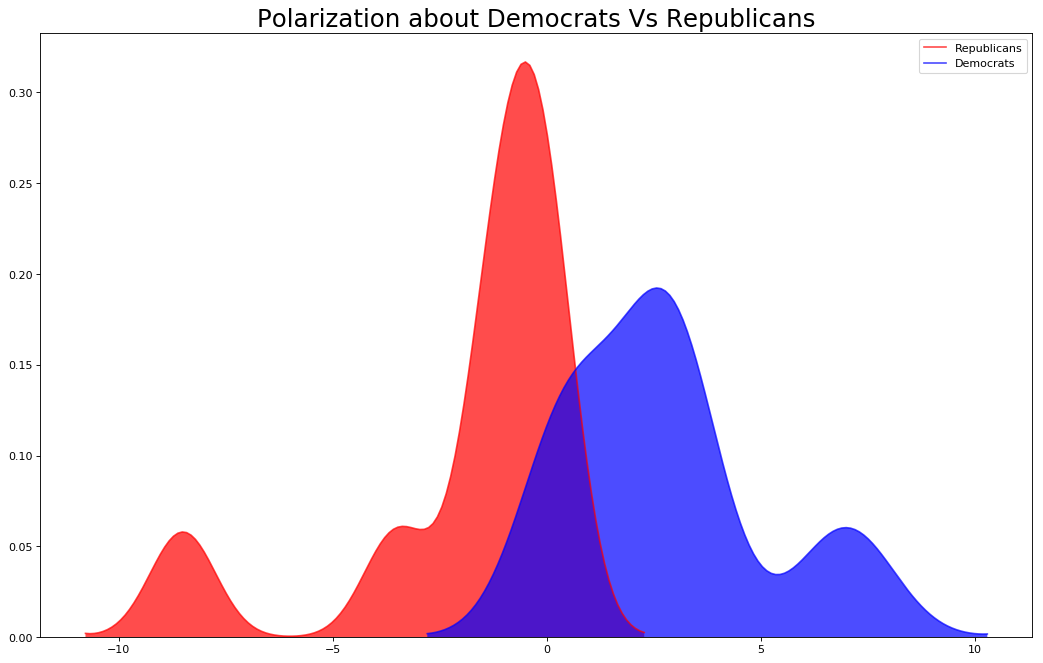

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(trumpList, shade=True, color="r", label="Republicans", alpha=.7)
sns.kdeplot(clintonList, shade=True, color="b", label="Democrats", alpha=.7)

# Decoration
plt.title('Polarization about Democrats Vs Republicans', fontsize=22)
plt.legend()
plt.show()